# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import warnings
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Utility lambda method to get cryptocurrency value in USD
get_crypto_price = lambda url, id_key: requests.get(url).json()["data"][id_key]["quotes"]["USD"]["price"]

In [7]:
# Fetch current BTC price
btc_price = get_crypto_price(btc_url,"1")

# Fetch current ETH price
eth_price = get_crypto_price(eth_url,"1027")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price 
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34017.60
The current value of your 5.3 ETH is $10225.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [10]:
# Utility method to convert current date to same date last year
def get_last_year(date):
    # Convert date to list
    date = list(date)
    # Subtract 1 from end of year
    date[3] = str(int(date[3])-1)
    # Return and join date as string
    return ''.join(date)

In [11]:
# Utility method to separate ticker data
def separate_ticker_data(df,ticker):
    # Symbol Column
    symbol = 'symbol'
    # Return DataFrame by ticker and drop several columns
    return df[df[symbol]==ticker].drop(columns=[symbol,'trade_count','vwap'], axis=1)

In [12]:
# Variable for date timezone
timezone = 'America/New_York'

In [13]:
# Utility lambda method to concatenate DataFrames
concatinate_dfs = lambda dataframes: pd.concat(dataframes, axis=1, join='inner', keys=["AGG", "SPY"])

In [14]:
# Format current date as ISO format
iso_date_today = pd.Timestamp(dt.today().strftime('%Y-%m-%d'), tz=timezone).isoformat()
iso_date_last_year = get_last_year(iso_date_today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
spy_agg_df = alpaca_api.get_bars(tickers,
                                 timeframe,
                                 start=iso_date_last_year,
                                 end=iso_date_today).df
# Reorganize the DataFrame
# Separate ticker data
agg_df = separate_ticker_data(spy_agg_df, tickers[0])
spy_df = separate_ticker_data(spy_agg_df, tickers[1])

# Concatenate the ticker DataFrames
spy_agg_df = concatinate_dfs([agg_df,spy_df])
# Preview DataFrame
spy_agg_df.head()

AGG                                         SPY  \
                             open      high     low   close    volume    open   
timestamp                                                                       
2022-04-20 04:00:00+00:00  103.36  103.7356  103.30  103.61   8433596  446.92   
2022-04-21 04:00:00+00:00  103.44  103.4700  102.79  103.04  11392788  448.54   
2022-04-22 04:00:00+00:00  102.73  103.1800  102.67  102.94   9150132  436.91   
2022-04-25 04:00:00+00:00  103.47  103.9300  103.47  103.63   8766104  423.67   
2022-04-26 04:00:00+00:00  104.13  104.1300  103.80  103.95   8533802  425.83   

                                                                
                               high     low   close     volume  
timestamp                                                       
2022-04-20 04:00:00+00:00  447.5700  443.48  444.71   64714530  
2022-04-21 04:00:00+00:00  450.0100  437.10  438.06   84866280  
2022-04-22 04:00:00+00:00  438.0825  425.44  426.04  132020752  
2022-04-25 04:00:00+00:00  428.6900  418.84  428.51  118808140  
2022-04-26 04:00:00+00:00  426.0400  416.07  416.10  101068359

In [15]:
# Utility lambda method to get latest closing price
get_latest_close = lambda df: df['close'][-1]

In [16]:
# Pick AGG and SPY close prices
agg_close_price = get_latest_close(agg_df)
spy_close_price = get_latest_close(spy_df)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.31
Current SPY closing price: $411.535


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20576.75
The current value of your 200 AGG shares is $19862.00


### Savings Health Analysis

In [18]:
# String varible for amount
amount = 'amount'

In [19]:
# Set monthly household income
monthly_income = 14000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame(data=[crypto,shares],index=['crypto', 'shares'], columns=[amount])

# Display savings DataFrame
display(df_savings)

,amount
crypto,44243.526
shares,40438.750


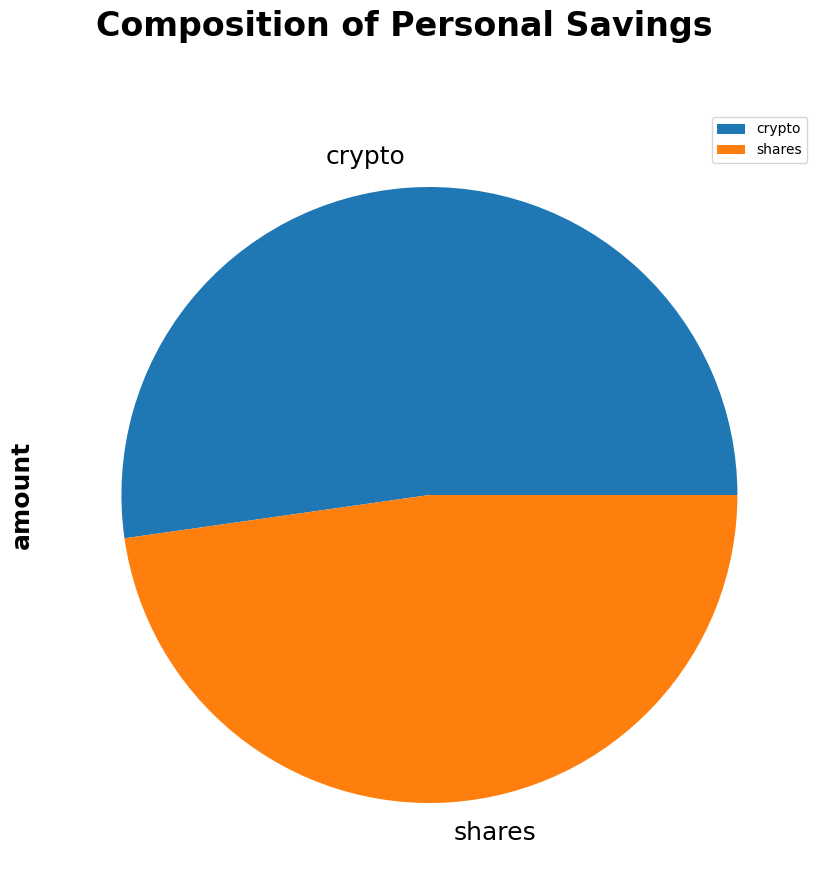

In [20]:
# Plot savings pie chart

# Varible for fontweight
fontweight_bold = 'bold'
# Variable for font size
fontsize_medium = 18

# Plotting Pie Chart
df_savings.plot.pie(y=amount,figsize=(20,10), fontsize=fontsize_medium);

# Setting Plot fontweight
plt.plot(fontweight=fontweight_bold);
# Styling Y Label
plt.ylabel(amount, fontsize=fontsize_medium, fontweight=fontweight_bold);
# Styling title
plt.suptitle('Composition of Personal Savings', fontsize=24, fontweight=fontweight_bold);

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 6

# Calculate total amount of savings
savings = df_savings[amount].sum()

# Validate saving health

# If savings are greater than emergency fund, print congratulations message
if savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
# If savings are equal to emergency fund, print congratulations message
elif savings == emergency_fund:
    print('Congratulations! You have reached your savings goal.')
# Savings are less than emergency fund, print money needed to reach savings goal message
else:
    money_needed = emergency_fund-savings
    print(f'You need ${money_needed} more dollars to reach your savings goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
spy_agg_df = alpaca_api.get_bars(tickers, timeframe,
                                    start=start_date,
                                    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = separate_ticker_data(spy_agg_df, tickers[0])
spy_df = separate_ticker_data(spy_agg_df, tickers[1])


# Concatenate the ticker DataFrames
stock_data_df = concatinate_dfs([agg_df,spy_df])

# Display sample data
stock_data_df.head()

AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                              SPY                                       
                             open      high      low   close    volume  
timestamp                                                               
2017-05-01 04:00:00+00:00  238.68  239.1700  238.195  238.63  66882521  
2017-05-02 04:00:00+00:00  238.84  238.9800  238.300  238.76  57375732  
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.52  73137731  
2017-05-04 04:00:00+00:00  238.83  238.9225  237.780  238.74  61462732  
2017-05-05 04:00:00+00:00  239.19  239.7200  238.680  239.68  62001269

In [24]:
# Utility method to return MCSimulation object by years
get_MCSimulation = lambda years: MCSimulation(portfolio_data = stock_data_df,
                                              weights = [.40,.60],
                                              num_simulation = 500,
                                              num_trading_days = 252*years)

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_simulation = get_MCSimulation(30)

In [26]:
# Printing the simulation input data
monte_carlo_simulation.portfolio_data.head()

AGG                                       \
                             open      high      low    close   volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  108.86  108.9599  108.620  108.730  2510027   
2017-05-02 04:00:00+00:00  108.68  108.9400  108.679  108.885  2841518   
2017-05-03 04:00:00+00:00  108.97  108.9900  108.770  108.795  1923403   
2017-05-04 04:00:00+00:00  108.55  108.7000  108.550  108.680  1897912   
2017-05-05 04:00:00+00:00  108.72  108.7400  108.570  108.700  1421843   

                                           SPY                             \
                          daily_return    open      high      low   close   
timestamp                                                                   
2017-05-01 04:00:00+00:00          NaN  238.68  239.1700  238.195  238.63   
2017-05-02 04:00:00+00:00     0.001426  238.84  238.9800  238.300  238.76   
2017-05-03 04:00:00+00:00    -0.000827  238.29  238.8775  237.700  238.52   
2017-05-04 04:00:00+00:00    -0.001057  238.83  238.9225  237.780  238.74   
2017-05-05 04:00:00+00:00     0.000184  239.19  239.7200  238.680  239.68   

                                                  
                             volume daily_return  
timestamp                                         
2017-05-01 04:00:00+00:00  66882521          NaN  
2017-05-02 04:00:00+00:00  57375732     0.000545  
2017-05-03 04:00:00+00:00  73137731    -0.001005  
2017-05-04 04:00:00+00:00  61462732     0.000922  
2017-05-05 04:00:00+00:00  62001269     0.003937

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjwen\API_Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998768,0.992837,1.006972,1.008149,1.001646,0.988747,1.000968,0.989215,1.005653,1.013892,...,0.993805,0.990621,1.002728,1.008623,1.000247,0.994824,1.011300,1.011328,0.995787,1.004798
2,1.016165,0.993395,0.997736,1.016528,0.995784,0.992812,1.000476,0.986196,1.002350,1.009624,...,0.996745,0.988886,0.999434,1.002194,1.012000,0.999292,0.993717,1.018520,0.996065,1.011681
3,1.014925,0.992561,0.983191,1.016589,0.991136,0.989972,1.002766,0.998779,0.996431,0.997301,...,0.996702,0.986678,1.005645,0.998926,1.004300,0.993086,0.990622,1.008481,0.986826,1.026600
4,1.003411,0.995583,0.978809,1.003406,1.000437,0.993082,1.004548,1.003982,0.995722,0.990464,...,0.995328,0.987416,0.996013,0.999277,0.993058,0.997705,1.006086,1.006941,0.990900,1.016376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.894260,7.186508,3.694653,4.048657,10.661070,3.921308,5.181991,18.820263,5.387435,4.367141,...,5.583107,3.296358,2.432564,7.490171,4.411306,6.423011,2.294148,15.137279,5.497348,13.545568
7557,3.857895,7.200483,3.691282,4.064292,10.532404,3.917509,5.110423,18.741559,5.409128,4.386946,...,5.494904,3.283707,2.451439,7.500705,4.406572,6.453471,2.282417,15.207021,5.491092,13.514654
7558,3.888872,7.089609,3.699350,4.017174,10.434887,3.937283,5.093111,18.996706,5.423403,4.391097,...,5.550026,3.294264,2.470323,7.502180,4.356729,6.480468,2.257341,15.263565,5.529032,13.405626
7559,3.888403,7.036227,3.716106,4.047485,10.482464,3.956203,5.064420,18.884665,5.393249,4.382595,...,5.564436,3.268369,2.482737,7.565200,4.423321,6.525126,2.246608,15.567626,5.569201,13.459207


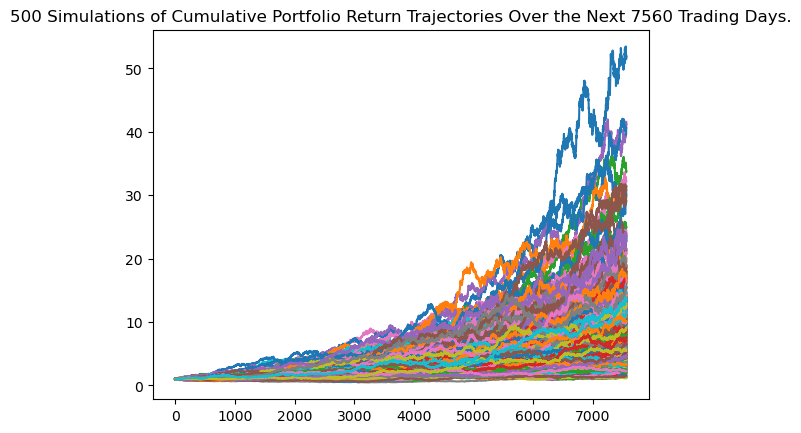

In [28]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

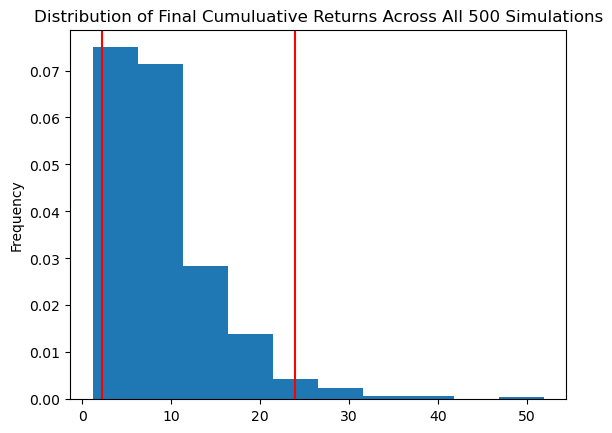

In [29]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean              9.131264
std               6.313790
min               1.181821
25%               4.965426
50%               7.388337
75%              11.681205
max              51.885110
95% CI Lower      2.161246
95% CI Upper     23.881946
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Utility method to get lower and upper confidence interval multiplied by investment
def calulate_ci_range(investment): 
    # Lambda method to calculate investment times CI rounded to two digits by index
    get_ci_by_investment = lambda index: round(investment * simulation_summary_statistics[index], 2)
    # Returning values for lower and upper CI
    return [get_ci_by_investment(8),get_ci_by_investment(9)]

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower, ci_upper = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43224.91 and $477638.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower, ci_upper = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64837.37 and $716458.38


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_simulation = get_MCSimulation(5)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjwen\API_Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011614,0.994218,1.003955,1.005171,1.001427,1.000700,0.998603,1.001649,0.987576,1.001615,...,0.993694,0.994389,0.991561,1.005043,1.004140,0.999819,1.001461,1.006912,0.997580,0.990815
2,1.012977,0.978526,1.002528,1.016313,1.011349,0.998969,0.996602,1.012074,0.995466,0.994553,...,0.984218,0.989924,0.995387,1.010419,1.003740,0.994135,0.998091,1.001769,0.996588,0.990857
3,1.015471,0.990535,1.005481,1.021417,1.017513,1.007031,0.996626,1.027793,1.007976,0.990677,...,0.970572,0.985487,0.980367,1.003751,1.004388,0.989237,1.012569,0.987357,0.995275,0.992584
4,1.021048,0.986419,1.008607,1.038999,1.010027,0.998340,0.991690,1.043262,1.013986,1.004924,...,0.966331,0.984788,0.984627,0.994426,1.001348,0.978613,1.022965,0.990593,0.991860,0.990027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.267230,1.444977,1.843656,1.382929,1.310172,1.549989,1.295275,2.056673,0.960121,1.848310,...,1.166948,1.249588,1.394003,1.199643,1.168721,1.768724,1.228214,1.779122,2.305121,1.745096
1257,1.278454,1.455770,1.850842,1.404000,1.316724,1.548270,1.290787,2.064841,0.956833,1.850772,...,1.152495,1.243309,1.414688,1.209303,1.160524,1.780332,1.213412,1.797442,2.296135,1.753761
1258,1.274865,1.448092,1.856855,1.399081,1.311681,1.533359,1.289585,2.083353,0.958702,1.854874,...,1.148272,1.239744,1.432360,1.217019,1.171454,1.765457,1.215808,1.802551,2.284972,1.735088
1259,1.287442,1.441799,1.867165,1.409009,1.301962,1.515844,1.288434,2.098221,0.958374,1.860450,...,1.151921,1.254921,1.430521,1.219458,1.172137,1.778833,1.212489,1.788899,2.292936,1.729358


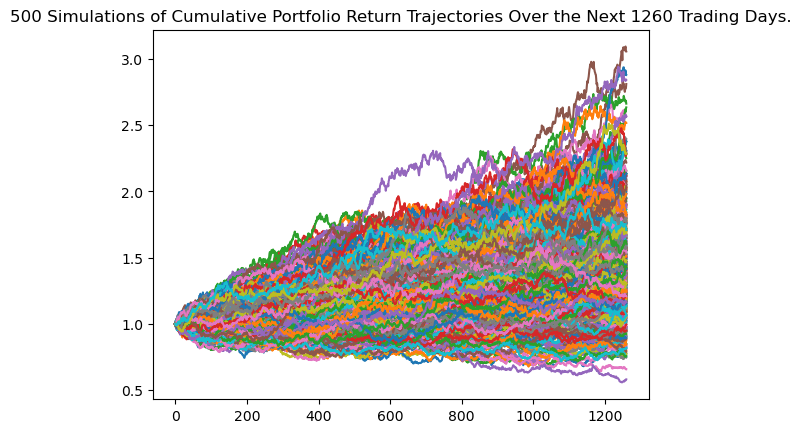

In [36]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

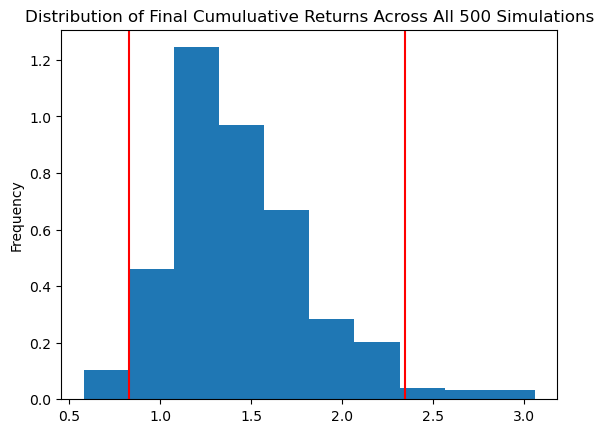

In [37]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean              1.442268
std               0.388309
min               0.581627
25%               1.185592
50%               1.366269
75%               1.643117
max               3.057063
95% CI Lower      0.827932
95% CI Upper      2.344658
Name: 1260, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five, ci_upper_five = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49675.94 and $140679.51


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation = get_MCSimulation(10)


In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\tjwen\API_Homework\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000533,0.994525,0.997183,1.003832,1.018025,1.006355,0.988375,1.001047,0.989055,1.003557,...,1.011726,1.012555,0.992742,1.000413,1.000043,1.002428,1.001171,1.003798,0.994608,1.002618
2,0.992250,0.995730,0.997210,0.996523,1.019757,1.004239,0.990210,0.989970,0.991032,0.983762,...,1.025310,1.015861,0.992057,1.008505,0.988998,0.985126,1.010756,1.003019,0.991141,1.011899
3,0.996754,0.989348,1.004650,0.989669,1.023433,0.995238,1.000830,0.983703,0.996006,0.987338,...,1.030781,1.014152,0.990809,1.009006,0.986738,0.983277,1.012569,1.005187,0.998640,1.004170
4,0.997076,0.992994,1.009853,0.978869,1.014006,0.982841,1.008006,0.981986,1.000528,0.986871,...,1.042621,1.013258,1.006135,1.001553,0.980965,0.983964,1.009908,1.005923,1.005150,1.007416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.115954,5.524487,3.143594,3.169076,2.097808,1.668604,1.498659,1.131651,2.878503,2.744266,...,2.587512,1.753625,2.342085,2.040167,1.835915,1.888055,2.660201,1.827308,1.369131,3.517631
2517,1.121875,5.417168,3.100325,3.173712,2.063285,1.654903,1.507357,1.114979,2.919086,2.739475,...,2.621507,1.763284,2.353518,2.035160,1.846556,1.893357,2.681864,1.836516,1.385990,3.492535
2518,1.115948,5.427520,3.094298,3.187121,2.072585,1.650487,1.524189,1.115659,2.953301,2.764374,...,2.638137,1.777835,2.343178,2.057465,1.857921,1.897781,2.703394,1.820823,1.383005,3.485556
2519,1.117576,5.411670,3.094058,3.219136,2.061109,1.653077,1.514066,1.118013,2.974499,2.773017,...,2.641406,1.766262,2.328022,2.078437,1.854390,1.915590,2.703989,1.804399,1.386387,3.498858


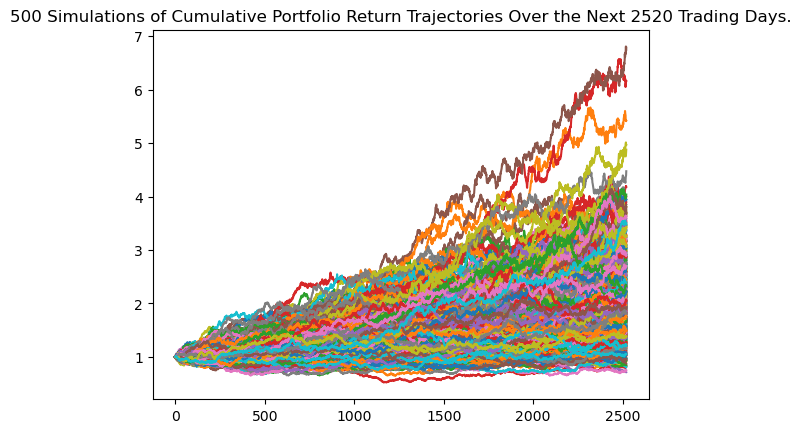

In [42]:
# Plot simulation outcomes
monte_carlo_simulation.plot_simulation();

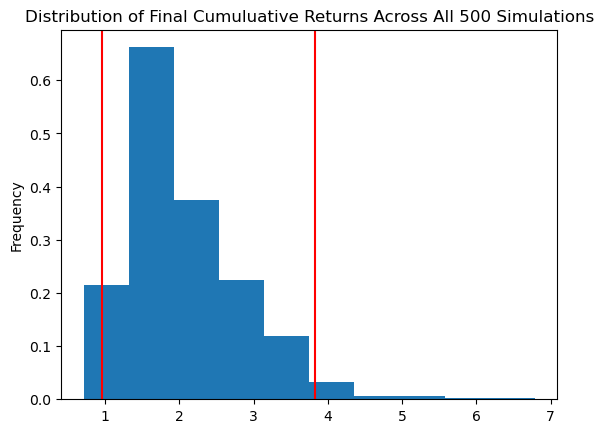

In [43]:
# Plot probability distribution and confidence intervals
monte_carlo_simulation.plot_distribution();

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
simulation_summary_statistics = monte_carlo_simulation.summarize_cumulative_return()

# Print summary statistics
print(simulation_summary_statistics)

count           500.000000
mean              2.073267
std               0.805328
min               0.715369
25%               1.523842
50%               1.882669
75%               2.516123
max               6.786229
95% CI Lower      0.964489
95% CI Upper      3.828851
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten, ci_upper_ten = calulate_ci_range(initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $57869.35 and $229731.06
